# Exploratory analysis

An attempt to derive some form of insight into the data

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn import svm
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/freddie/PycharmProjects/Resume_Project/AB_NYC_2019.csv', encoding='utf_8')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
df_cat = df[['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']]
df_cat.head()

,name,host_name,neighbourhood_group,neighbourhood,room_type
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt


In [8]:
df_num = df.drop(['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type'], axis=1)
df_num.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,365
1,2595,2845,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355
2,3647,4632,40.80902,-73.94190,150,3,0,NaN,NaN,1,365
3,3831,4869,40.68514,-73.95976,89,1,270,2019-07-05,4.64,1,194
4,5022,7192,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0


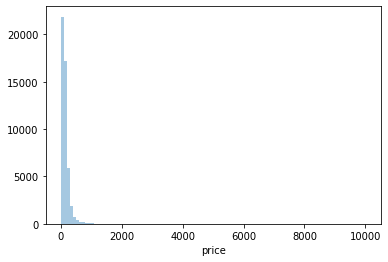

In [22]:
sns.distplot(df['price'], bins=100, kde=False, rug=False);

In [26]:
df_num.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


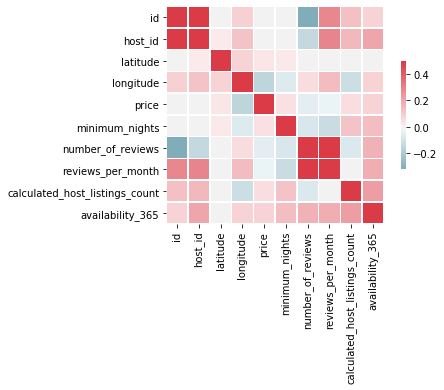

In [25]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_num.corr(),vmax=.5, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [28]:
pd.pivot_table(df, index = 'room_type', values = 'price').sort_values('price', ascending = False)

,price
room_type,
Entire home/apt,211.794246
Private room,89.780973
Shared room,70.127586


In [29]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [33]:
pd.pivot_table(df, index = ['neighbourhood_group'], values = 'price').sort_values('price', ascending = False)

,price
neighbourhood_group,
Manhattan,196.875814
Brooklyn,124.383207
Staten Island,114.812332
Queens,99.517649
Bronx,87.496792


In [39]:
X = pd.pivot_table(df, index = ['neighbourhood_group', 'neighbourhood'], values = 'price').sort_values('price', ascending = False)
X.head(40)

price
neighbourhood_group neighbourhood                 
Staten Island       Fort Wadsworth      800.000000
                    Woodrow             700.000000
Manhattan           Tribeca             490.638418
Brooklyn            Sea Gate            487.857143
Bronx               Riverdale           442.090909
Staten Island       Prince's Bay        409.500000
Manhattan           Battery Park City   367.557143
                    Flatiron District   341.925000
Staten Island       Randall Manor       336.000000
Manhattan           NoHo                295.717949
                    SoHo                287.103352
                    Midtown             282.719094
Queens              Neponsit            274.666667
Manhattan           West Village        267.682292
                    Greenwich Village   263.405612
                    Chelsea             249.738544
Staten Island       Willowbrook         249.000000
Manhattan           Theater District    248.013889
                    Nolita              230.138340
                    Financial District  225.490591
                    Gramercy            222.754438
                    Little Italy        222.066116
                    Murray Hill         220.958763
Queens              Breezy Point        213.333333
Brooklyn            Cobble Hill         211.929293
Manhattan           Upper West Side     210.918316
Brooklyn            Brooklyn Heights    209.064935
Manhattan           Hell's Kitchen      204.794178
                    Kips Bay            202.408511
Brooklyn            DUMBO               196.305556
Manhattan           Civic Center        191.942308
                    Upper East Side     188.948276
Brooklyn            Vinegar Hill        187.176471
Manhattan           Lower East Side     186.312843
                    East Village        186.083108
Queens              Jamaica Estates     182.947368
Brooklyn            Clinton Hill        181.893357
                    Mill Basin          179.750000
                    Park Slope          176.312253
                    Boerum Hill         176.135593